<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Project-Objective" data-toc-modified-id="Project-Objective-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Project Objective</a></span></li><li><span><a href="#Dataset-Description" data-toc-modified-id="Dataset-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset Description</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Imports</a></span></li></ul></div>

# Table of Contents



# Introduction

## Project Objective

## Dataset Description

The dataset used for this analysis is sourced from Kaggle, specifically the [Dataset for Detection of Cyber-Trolls](https://www.kaggle.com/datasets/dataturks/dataset-for-detection-of-cybertrolls).

This dataset consists of tweets that have been manually classified as either aggressive (potentially from trolls) or not aggressive. 

Key features of the dataset:
- Contains 20,001 items (tweets).
- Each tweet has been manually labeled.
- The labels are categorized into two groups:
    - 1 represents Cyber-Aggressive (potentially from trolls).
    - 0 represents Non Cyber-Aggressive.

This dataset serves as a valuable resource for training a machine learning model to identify troll behavior on social media platforms, thereby aiding in online safety and content moderation efforts.

## Imports

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from collections import Counter

In [2]:
# nltk.download('stopwords')

# Data Loading and Initial Inspection

In [3]:
df = pd.read_json('../Data/Dataset for Detection of Cyber-Trolls.json', lines= True)

In [4]:
df.head()

,content,annotation,extras
0,Get fucking real dude.,"{'notes': '', 'label': ['1']}",NaN
1,She is as dirty as they come and that crook ...,"{'notes': '', 'label': ['1']}",NaN
2,why did you fuck it up. I could do it all day...,"{'notes': '', 'label': ['1']}",NaN
3,Dude they dont finish enclosing the fucking s...,"{'notes': '', 'label': ['1']}",NaN
4,WTF are you talking about Men? No men thats n...,"{'notes': '', 'label': ['1']}",NaN


In [5]:
df.shape

(20001, 3)

In [6]:
df.isnull().sum()

content           0
annotation        0
extras        20001
dtype: int64

`extras` column is entirely null, so we will be dropping it.

In [7]:
df = df.drop(['extras'], axis=1)

After dropping the 'extras' column, we now have a dataset with two useful features: 'content' and 'annotation'. The 'content' column contains the text of the social media posts, while the 'annotation' column carries a dictionary object with 'notes' and 'label' keys. 

However, for ease of analysis, it is more convenient to have 'troll' (which indicates whether a post is made by a troll or not) as a separate column rather than embedded within 'annotation'. Hence, we extract 'label' from the 'annotation' column and add it as a new column to the dataframe.

In [8]:
# Create Binary column 'Troll'
df['Troll'] = df['annotation'].apply(lambda x: x['label'][0])

# Convert Troll column to integers
df['Troll'] = df['Troll'].astype(int)

# Remove old column 'annotation' as it is entirely redundant now.
df = df.drop(['annotation'], axis=1)

Once this is done, we then count the number of each label to see the distribution of troll and non-troll posts in our dataset. The countplot visualization gives a clear picture of this distribution. The '0' label represents non-troll posts and '1' represents troll posts.

In [9]:
df['Troll'].value_counts()

0    12179
1     7822
Name: Troll, dtype: int64

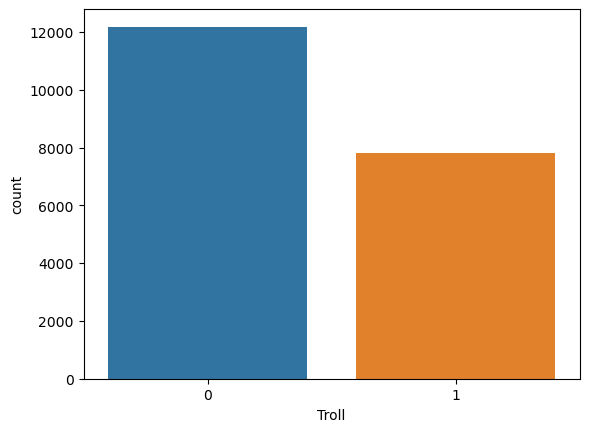

In [10]:
sns.countplot(x='Troll', data=df)
plt.show()

In [11]:
df

,content,Troll
0,Get fucking real dude.,1
1,She is as dirty as they come and that crook ...,1
2,why did you fuck it up. I could do it all day...,1
3,Dude they dont finish enclosing the fucking s...,1
4,WTF are you talking about Men? No men thats n...,1
...,...,...
19996,I dont. But what is complaining about it goi...,0
19997,Bahah yeah i&;m totally just gonna&; get pis...,0
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0
19999,What&;s something unique about Ohio? :),0


# Data Preprocessing

In [12]:
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase the text
    text = text.lower()
    
    # Tokenize the text
    words = word_tokenize(text)
    
    # Remove punctuation and filter out stop words
    words = [word for word in words if word.isalpha() and word not in stop_words]

    return words

# Apply the preprocessing to the 'content' column
df['cleaned_words'] = df['content'].apply(preprocess_text)

In [13]:
df

,content,Troll,cleaned_words
0,Get fucking real dude.,1,"[get, fucking, real, dude]"
1,She is as dirty as they come and that crook ...,1,"[dirty, come, crook, rengel, dems, fucking, co..."
2,why did you fuck it up. I could do it all day...,1,"[fuck, could, day, let, hour, ping, later, sch..."
3,Dude they dont finish enclosing the fucking s...,1,"[dude, dont, finish, enclosing, fucking, showe..."
4,WTF are you talking about Men? No men thats n...,1,"[wtf, talking, men, men, thats, menage, gay]"
...,...,...,...
19996,I dont. But what is complaining about it goi...,0,"[dont, complaining, going]"
19997,Bahah yeah i&;m totally just gonna&; get pis...,0,"[bahah, yeah, totally, gon, na, get, pissed, t..."
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0,"[hahahahaha, im, evil, mwahahahahahahahahaha]"
19999,What&;s something unique about Ohio? :),0,"[something, unique, ohio]"


In [14]:
# Concatenate all the lists of words
all_words = [word for words in df['cleaned_words'] for word in words]

# Count the frequency of each word
word_freq = Counter(all_words)

# EDA

Now we have our column `Troll` which identifies if a post is a Troll post (1) or a Non-Troll post (0). 

As well as our column `cleaned_words` which contains the tokenized versions of the content of the post.

In [15]:
df

,content,Troll,cleaned_words
0,Get fucking real dude.,1,"[get, fucking, real, dude]"
1,She is as dirty as they come and that crook ...,1,"[dirty, come, crook, rengel, dems, fucking, co..."
2,why did you fuck it up. I could do it all day...,1,"[fuck, could, day, let, hour, ping, later, sch..."
3,Dude they dont finish enclosing the fucking s...,1,"[dude, dont, finish, enclosing, fucking, showe..."
4,WTF are you talking about Men? No men thats n...,1,"[wtf, talking, men, men, thats, menage, gay]"
...,...,...,...
19996,I dont. But what is complaining about it goi...,0,"[dont, complaining, going]"
19997,Bahah yeah i&;m totally just gonna&; get pis...,0,"[bahah, yeah, totally, gon, na, get, pissed, t..."
19998,hahahahaha >:) im evil mwahahahahahahahahaha,0,"[hahahahaha, im, evil, mwahahahahahahahahaha]"
19999,What&;s something unique about Ohio? :),0,"[something, unique, ohio]"


In [16]:
troll_df = df[df['Troll'] == 1]
non_troll_df = df[df['Troll'] == 0]

In [17]:
# Get word frequencies for both dataframes
troll_words = [word for words_list in troll_df['cleaned_words'] for word in words_list]
troll_word_freq = Counter(troll_words)

non_troll_words = [word for words_list in non_troll_df['cleaned_words'] for word in words_list]
non_troll_word_freq = Counter(non_troll_words)

In [18]:
# Get top N words based on combined frequency
N = 20 

combined_freq = troll_word_freq + non_troll_word_freq
top_words = [word for word, freq in combined_freq.most_common(N)]

# Prepare data for plotting
troll_counts = [troll_word_freq[word] for word in top_words]
non_troll_counts = [non_troll_word_freq[word] for word in top_words]

Below, we visualize the top words from the `cleaned_words` column, differentiating between Troll and Non-Troll posts. This will give us an understanding of the most frequently used words in each category.

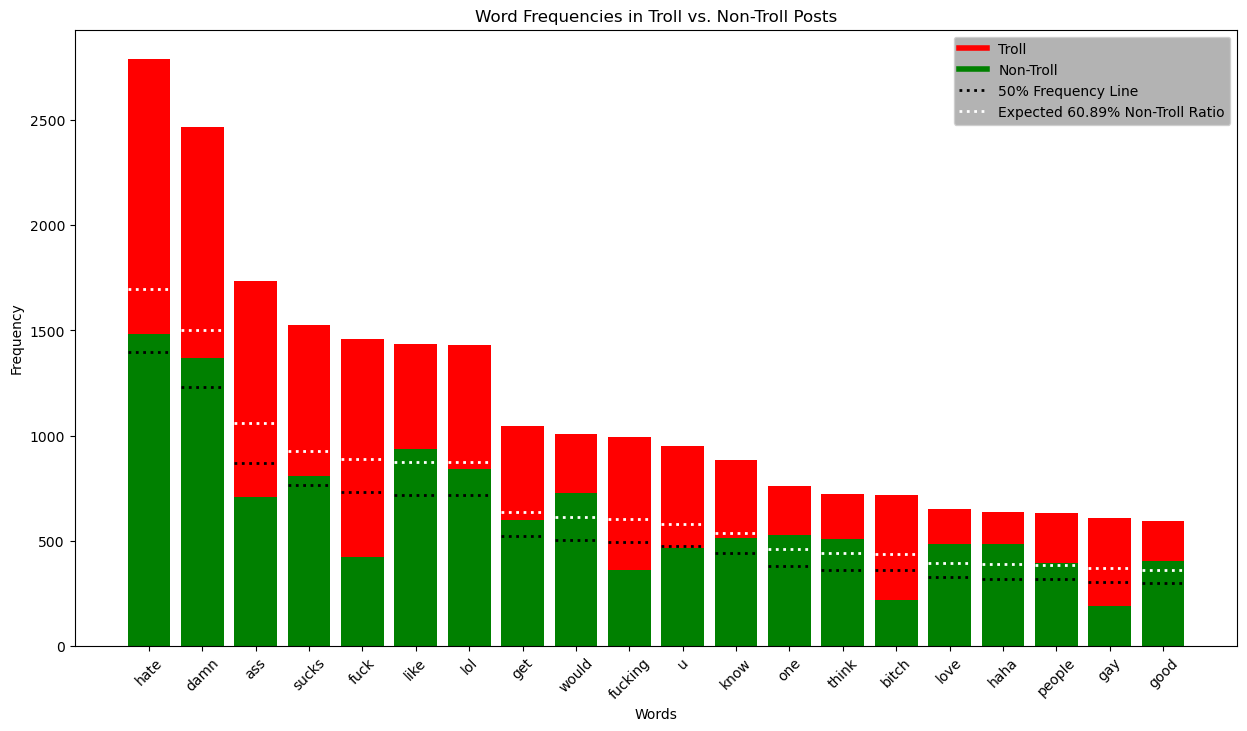

In [19]:
plt.figure(figsize=(15, 8))

# Create the bar objects
bars1 = plt.bar(top_words, troll_counts, label='Troll', color='red', bottom=non_troll_counts)
bars2 = plt.bar(top_words, non_troll_counts, label='Non-Troll', color='green')

# Calculate the expected ratio based on the total number of non-troll posts
expected_non_troll_ratio = 12179 / 20001

# Add the 50% line and the expected ratio line to each stacked bar
for bar1, bar2 in zip(bars1, bars2):
    total_height = bar1.get_height() + bar2.get_height()
    
    # 50% line
    half = total_height / 2
    plt.hlines(bar2.get_y() + half, bar1.get_x(), bar1.get_x() + bar1.get_width(), colors='black', linestyles='dotted', lw=2)
    
    # Expected ratio line
    expected_height = total_height * expected_non_troll_ratio
    plt.hlines(bar2.get_y() + expected_height, bar1.get_x(), bar1.get_x() + bar1.get_width(), colors='white', linestyles='dotted', lw=2)

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequencies in Troll vs. Non-Troll Posts')
plt.xticks(rotation=45)

# Custom legend entries
legend_elements = [Line2D([0], [0], color='red', lw=4, label='Troll'),
                   Line2D([0], [0], color='green', lw=4, label='Non-Troll'),
                   Line2D([0], [0], color='black', linestyle='dotted', lw=2, label='50% Frequency Line'),
                   Line2D([0], [0], color='white', linestyle='dotted', lw=2, label=f'Expected {expected_non_troll_ratio:.2%} Non-Troll Ratio')]

legend = plt.legend(handles=legend_elements, loc='upper right')

# Set the background color for the legend to a darker grey
legend.get_frame().set_facecolor('#a0a0a0')

plt.show()

---
**Visualization Disclaimer**:

The visualization displayed above showcases the frequency of various words present in the `cleaned_words` column of our dataset. The color distinction is made based on the Troll status:

- **Red** represents words from posts that are labeled as Troll (i.e., Troll = 1).
- **Green** represents words from posts that are not labeled as Troll (i.e., Troll = 0).

Additional markers have been added to the visualization for clarity:
- The **black dotted line** on each bar represents the 50% mark of the combined frequency for a given word.
- The **white dotted line** on each bar indicates the expected distribution of words from non-troll posts (green section) based on the overall ratio of troll to non-troll posts in the dataset.

It's important to note that the dataset contains a skewed distribution of labels:
- Non-Troll posts (Troll = 0): **12,179**
- Troll posts (Troll = 1): **7,822**

This means that there are more non-troll posts than troll posts in the dataset. Therefore, while interpreting the visualization, one should keep this skewness in mind. It is entirely possible for certain words to appear frequently in both troll and non-troll posts. The stacking of colors in the histogram, along with the dotted lines, aims to capture this overlap and give a more holistic view of the word distribution across both categories.

---